<a href="https://colab.research.google.com/github/Nurkyial/DataVisualization/blob/main/lab1_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Алмазова Нуркыял

М23-534

Лабораторная работа №1

1.	Сгенерировать данные

In [ ]:
import numpy as np
import pandas as pd

n=500
df=pd.DataFrame({'код респондента':np.random.randint(1,np.int32(0.33*n),size=n),
                 'дата опроса':np.random.choice(['2020-01-31','2021-01-31','2022-02-03','2019-06-06'],size=n),
    'пол':np.random.choice(['муж','жен'],size=n,p=(0.35,0.65)),
'образование':np.random.choice(['высшее','незаконченное высшее',
                                'среднее','среднее специальное'],p=(0.1,0.1,0.4,0.4),size=n),
                 'социальный статус':np.random.choice(['холост/незамужем','женат/замужем',
                                'вдовец/вдова','разведен/разведена'],p=(0.45,0.05,0.05,0.45),size=n),
'возраст':np.rint(np.random.normal(45,15,size=n)),
'рост':list(np.rint(np.random.normal(160,20,size=int(n*0.9))))+
      list(np.rint(np.random.normal(180,20,size=n-int(n*0.9))))
      })
df['вес']=df['рост']-(100+(df['рост']-100)/20)+np.rint(np.random.normal(10,2,size=n))


По полученным данным создать следующие базовые диаграммы

2.1.	Создать круговую диаграмму, описывающую частоты значений переменной «образование». Добавить название графика.






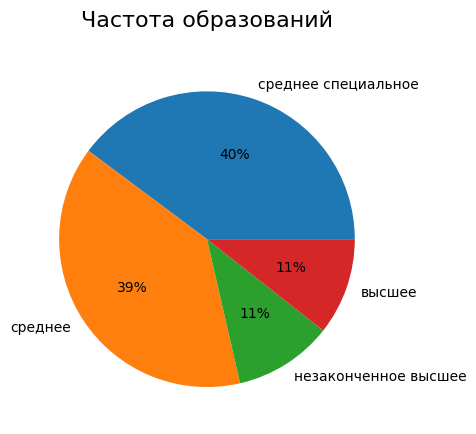

In [ ]:
import matplotlib.pyplot as plt

education = df['образование'].value_counts()
plt.pie(x=education, labels=education.index, autopct='%1.0f%%')
plt.title('Частота образований', fontdict={"fontsize":16}, pad=20)
plt.show()

2.2.	Создать диаграмму рассеяния, описывающую зависимость между переменными «рост» и «вес». Добавить подписи осей. Добавить сетку.

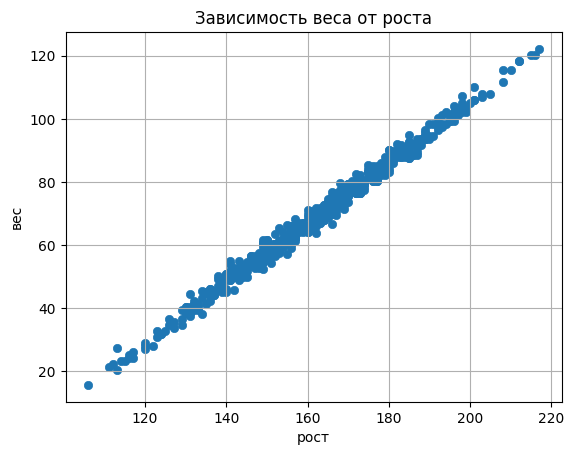

In [ ]:
height = df['рост']
weight = df['вес']
plt.scatter(x=height, y=weight, linewidths = 0.5)
plt.title("Зависимость веса от роста")
plt.xlabel("рост")
plt.ylabel("вес")
plt.grid()
plt.show()

2.3.	Создать диаграмму «ящик-с-усами» описывающую распределение переменной «рост». Добавить значения и названия статистик на график.

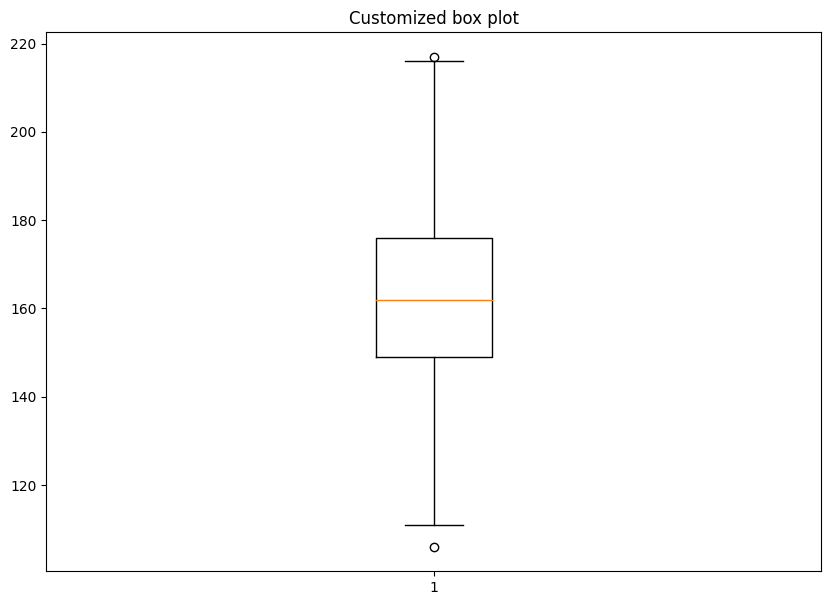

In [ ]:
height = df['рост']
plt.figure(figsize =(10, 7))
plt.boxplot(height)
plt.title("Customized box plot")
plt.show()

2.4.	Создать гистограмму, описывающую частоты значений переменной «социальный статус». Добавить подписи значений частот на диаграмму

холост/незамужем      243
разведен/разведена    205
женат/замужем          29
вдовец/вдова           23
Name: социальный статус, dtype: int64


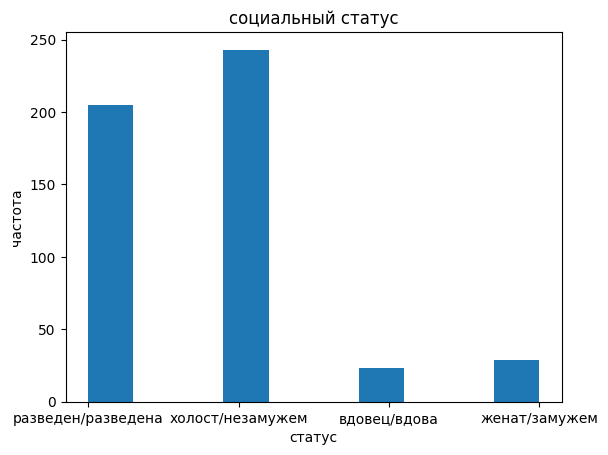

In [ ]:
social_status = df['социальный статус'].value_counts()
print(social_status)
plt.hist(df['социальный статус'])
plt.xlabel('статус')
plt.ylabel('частота')
plt.title('социальный статус')
plt.show()

3.	Добавить линию тренда (линейной регрессии) на диаграмму 2.2

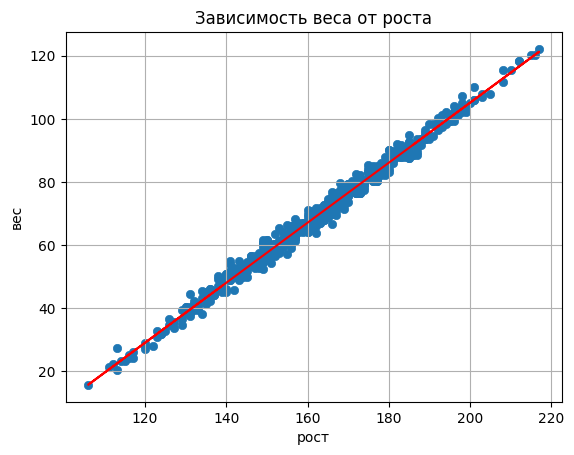

In [ ]:
height = df['рост']
weight = df['вес']
plt.scatter(x=height, y=weight, linewidths = 0.5)


# calculation of the equation for trendline
z = np.polyfit(height, weight, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(height, p(height), color="red")

plt.title("Зависимость веса от роста")
plt.xlabel("рост")
plt.ylabel("вес")
plt.grid()
plt.show()

4.	Создать единую диаграмму, с использованием вложенных графиков (subplots), с использованием графиков из пп.2

Text(0.5, 0.98, 'subplots')

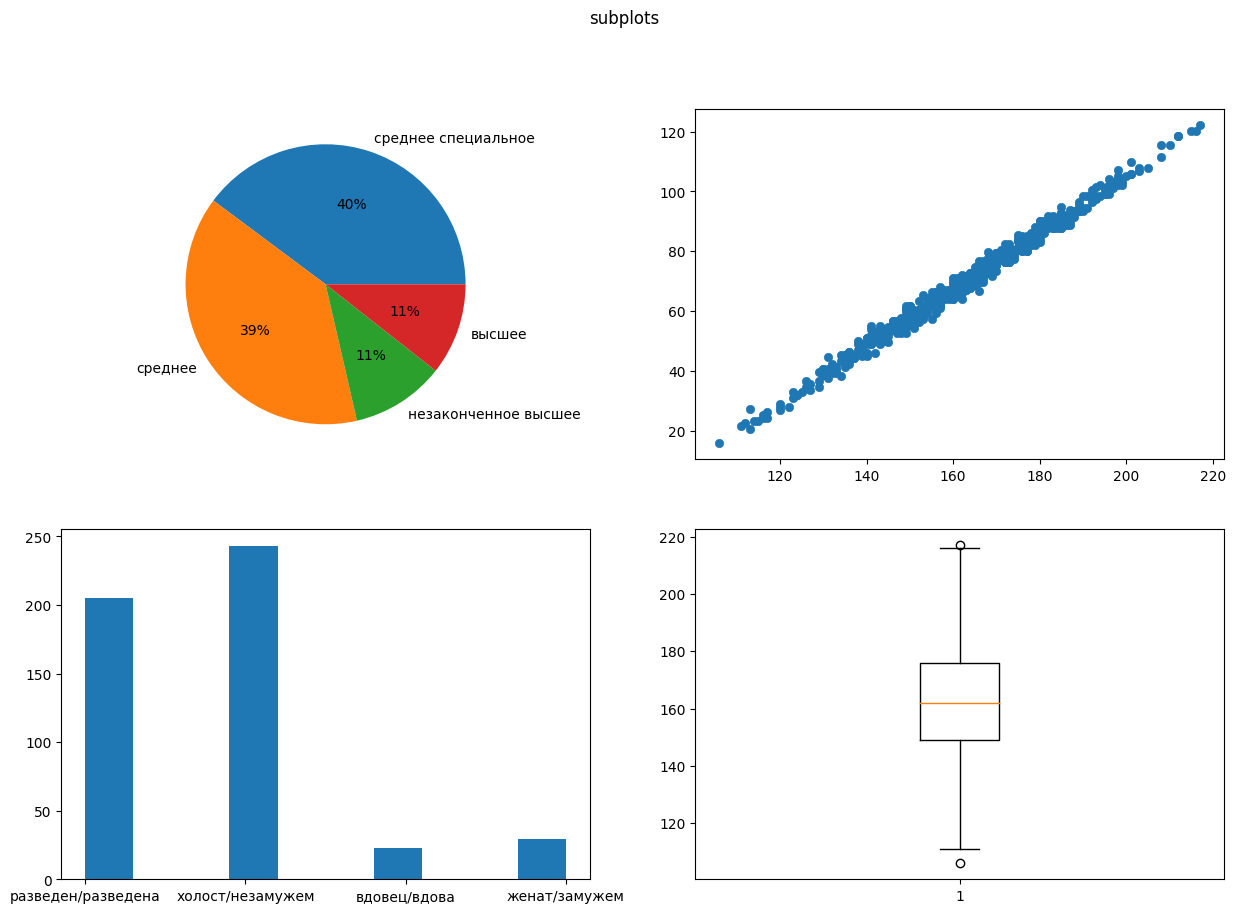

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax[0, 0].pie(x=education, labels=education.index, autopct='%1.0f%%')
ax[0, 1].scatter(x=height, y=weight, linewidths = 0.5)
ax[1, 0].hist(df['социальный статус'])
ax[1, 1].boxplot(height)
fig.suptitle('subplots')


5.	Создать тепловую карту, соответствующую матрице корреляции между переменными «рост» и «вес».

[[1.         0.99485976]
 [0.99485976 1.        ]]


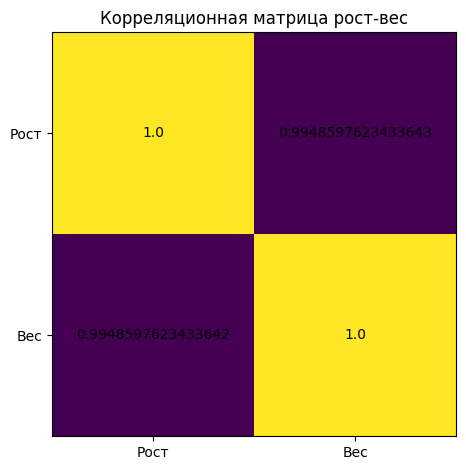

In [ ]:
from matplotlib import colors

height = df['рост']
weight = df['вес']

matrix = np.corrcoef(height, weight)
print(matrix)

fig, ax = plt.subplots()
im = ax.imshow(matrix)

# Устанавливаем тики
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))

# Устанавливаем названия областей
ax.set_xticklabels(['Рост', 'Вес'])
ax.set_yticklabels(['Рост', 'Вес'])

for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha="center", va="center", color="black")
ax.set_title("Корреляционная матрица рост-вес")
fig.tight_layout()
plt.show()

6.	Добавить разделение по полу на график из 2.3

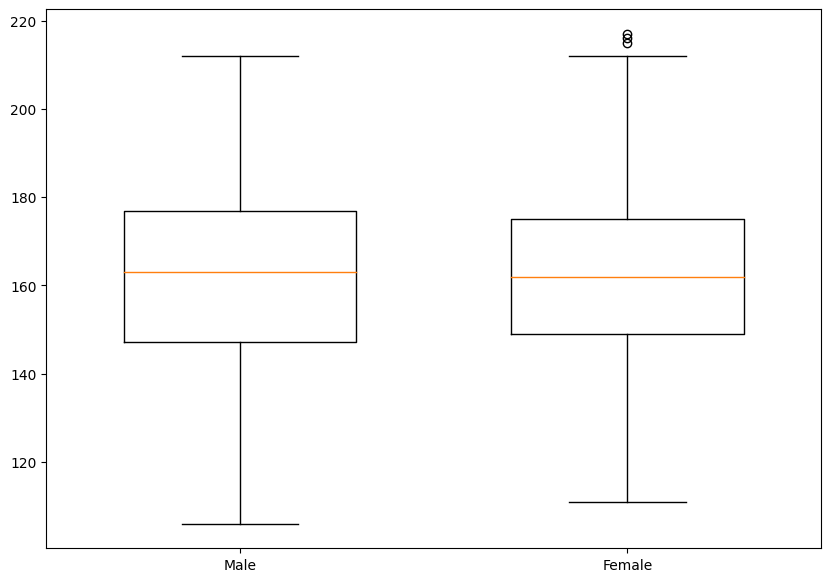

In [ ]:
male_height = df.loc[df['пол'] == 'муж', 'рост']
female_height = df.loc[df['пол'] == 'жен', 'рост']

plt.figure(figsize=(10, 7))
data_to_plot = [male_height, female_height]
positions = [1, 2]
plt.boxplot(data_to_plot, positions=positions, widths=0.6)
plt.xticks(positions, ['Male', 'Female'])

plt.show()


7.	Создать тепловую карту, соответствующую изменению среднего значения переменной «вес», в зависимости от «пол» и «социальный статус».

социальный статус  вдовец/вдова  женат/замужем  разведен/разведена  \
пол                                                                  
жен                   81.611538      73.759375           66.645890   
муж                   67.195000      85.946154           67.701695   

социальный статус  холост/незамужем  
пол                                  
жен                       68.831457  
муж                       68.682609  


<ipython-input-13-5c27f6602c27>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(df['социальный статус'].unique()), rotation=90)
<ipython-input-13-5c27f6602c27>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(df['пол'].unique()))


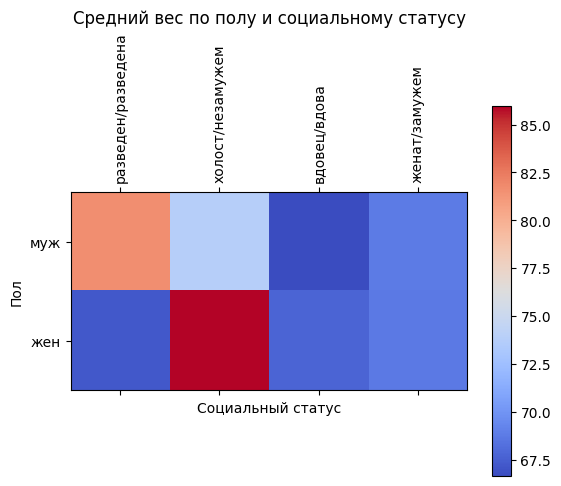

In [ ]:
pivot_table = df.pivot_table(values='вес', index='пол', columns='социальный статус', aggfunc='mean')
print(pivot_table)
pivot_table.index = range(pivot_table.shape[0])
pivot_table.columns = range(pivot_table.shape[1])

fig, ax = plt.subplots()
cax = ax.matshow(pivot_table, interpolation='nearest', cmap='coolwarm')
fig.colorbar(cax)

# Установка меток осей
ax.set_xticklabels([''] + list(df['социальный статус'].unique()), rotation=90)
ax.set_yticklabels([''] + list(df['пол'].unique()))

# Название графика и меток осей
plt.title('Средний вес по полу и социальному статусу')
plt.ylabel('Пол')
plt.xlabel('Социальный статус')

plt.show()

8.	Создать матрицу диаграмм «ящик-с-усами» для переменных «рост», «вес» в зависимости от переменной «пол».

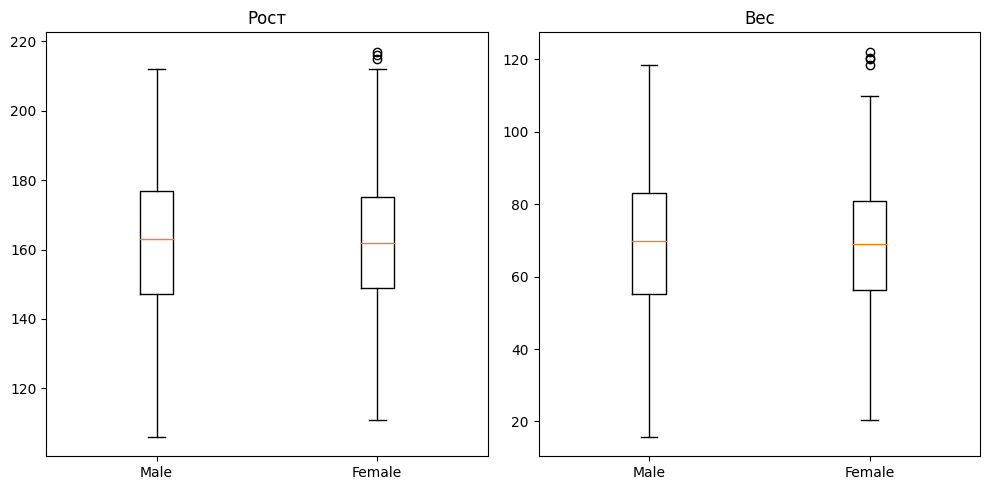

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

male_height = df.loc[df['пол'] == 'муж', 'рост']
female_height = df.loc[df['пол'] == 'жен', 'рост']

male_weight = df.loc[df['пол'] == 'муж', 'вес']
female_weight = df.loc[df['пол'] == 'жен', 'вес']

# Диаграмма ящик с усами для роста
axes[0].boxplot([male_height, female_height], labels=['Male', 'Female'])
axes[0].set_title('Рост')

# Диаграмма ящик с усами для веса с непосредственным указанием меток
axes[1].boxplot([male_weight, female_weight], labels=['Male', 'Female'])
axes[1].set_title('Вес')

plt.tight_layout()
plt.show()

9.	Создать график с двумя осями – для эмпирической плотности частоты переменных «социальный статус» и «образование»

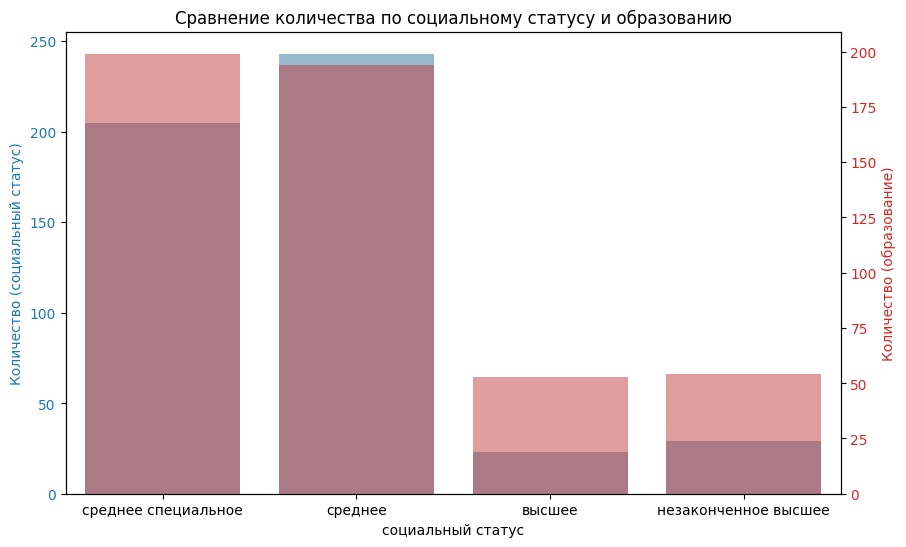

In [ ]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(10, 6))
color1 = 'tab:blue'
color2 = 'tab:red'

# Столбчатая диаграмма для "социального статуса"
sns.countplot(x='социальный статус', data=df, ax=ax1, color=color1, alpha=0.5)
ax1.set_ylabel('Количество (социальный статус)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
sns.countplot(x='образование', data=df, ax=ax2, color=color2, alpha=0.5)
ax2.set_ylabel('Количество (образование)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.title('Сравнение количества по социальному статусу и образованию')
plt.show()


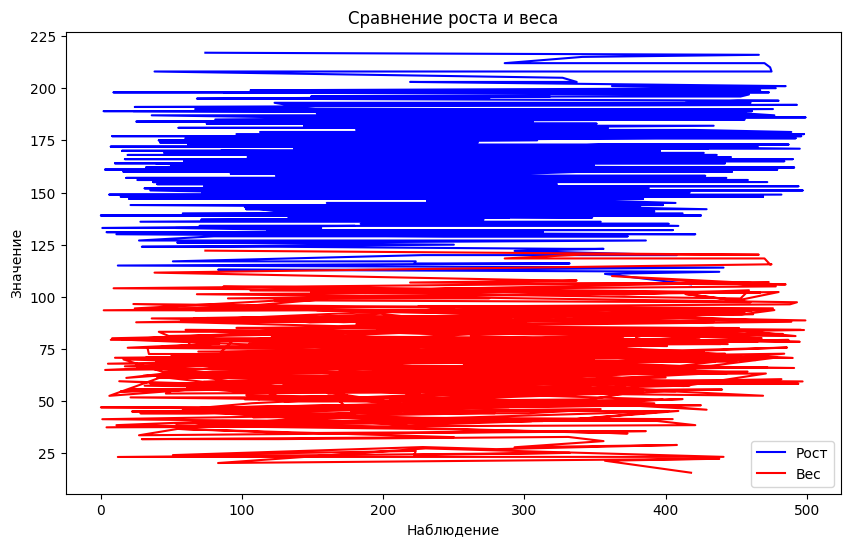

In [ ]:
df_sorted_by_height = df.sort_values('рост')

plt.figure(figsize=(10, 6))
plt.plot(df_sorted_by_height['рост'], label='Рост', color='blue')

plt.plot(df_sorted_by_height['вес'], label='Вес', color='red')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение роста и веса')
plt.legend()

plt.show()
